In [1]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split

# Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.naive_bayes import GaussianNB 


# Warnings
import warnings as ws
ws.filterwarnings('ignore')


In [2]:
# Load Dataset
banknote_dataset = pd.read_csv("BankNote_Authentication.csv")
banknote_dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
banknote_dataset.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [4]:
df = pd.DataFrame(banknote_dataset)
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df = df.astype(float)
df['class'] = df['class'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   object 
dtypes: float64(4), object(1)
memory usage: 53.7+ KB


# Decision Tree classification

## DATA PREPROCESSING

In [6]:
X = df[['variance', 'skewness', 'curtosis', 'entropy']].values
X[0:5]

array([[ 3.6216 ,  8.6661 , -2.8073 , -0.44699],
       [ 4.5459 ,  8.1674 , -2.4586 , -1.4621 ],
       [ 3.866  , -2.6383 ,  1.9242 ,  0.10645],
       [ 3.4566 ,  9.5228 , -4.0112 , -3.5944 ],
       [ 0.32924, -4.4552 ,  4.5718 , -0.9888 ]])

In [7]:
Y = df['class']
Y[0:5]

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: object

## Training and Testing Data set 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=3) # train:test ratio 70:30
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.2, random_state=3) # train:test ratio 80:20
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, Y, test_size=0.1, random_state=3) # train:test ratio 90:10


## Modelling using Decision Tree Classifier

In [9]:
bank_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
bank_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
bank_tree.fit(x_train, y_train) # train:test ratio 70:30

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
bank_tree.fit(x_train1, y_train1) # train:test ratio 80:20

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
bank_tree.fit(x_train2, y_train2) # train:test ratio 90:10

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
pred_tree = bank_tree.predict(x_test)
pred_tree[0:10]

array(['1.0', '0.0', '0.0', '1.0', '1.0', '0.0', '1.0', '0.0', '1.0',
       '1.0'], dtype=object)

In [14]:
pred_tree_train = bank_tree.predict(x_train)
pred_tree_train[0:5]

array(['0.0', '1.0', '1.0', '1.0', '1.0'], dtype=object)

In [15]:
y_pred_proba = bank_tree.predict_proba(x_test)
y_pred_proba[0:10]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.00909091, 0.99090909],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.99375   , 0.00625   ],
       [0.        , 1.        ],
       [0.00909091, 0.99090909]])

In [16]:
y_pred_proba1 = bank_tree.predict_proba(x_test1)
y_pred_proba1[0:10]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.00909091, 0.99090909],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.99375   , 0.00625   ],
       [0.        , 1.        ],
       [0.00909091, 0.99090909]])

In [17]:
y_pred_proba2 = bank_tree.predict_proba(x_test2)
y_pred_proba2[0:10]

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.00909091, 0.99090909],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.99375   , 0.00625   ],
       [0.        , 1.        ],
       [0.00909091, 0.99090909]])

## Evaluation metrics

In [18]:
# train:test ratio 70:30
from sklearn import metrics
loss = metrics.log_loss(y_test,y_pred_proba[:,1])*100
auc = metrics.roc_auc_score(y_test, y_pred_proba[:,1])*100
print("DecisionTrees's Accuracy(Test set Accuracy): ", metrics.accuracy_score(y_test, pred_tree)*100)
print("Train set Accuracy:", metrics.accuracy_score(y_train, pred_tree_train)*100)
print("Log loss of test set:", loss )
print("Area Under the Receiver Operating Characteristic Curve:", auc)

DecisionTrees's Accuracy(Test set Accuracy):  97.33009708737865
Train set Accuracy: 98.64583333333333
Log loss of test set: 15.698798143614345
Area Under the Receiver Operating Characteristic Curve: 99.36531007751938


In [19]:
# train:test ratio 80:20
from sklearn import metrics
loss = metrics.log_loss(y_test1,y_pred_proba1[:,1])*100
auc = metrics.roc_auc_score(y_test1, y_pred_proba1[:,1])*100
print("DecisionTrees's Accuracy(Test set Accuracy): ", metrics.accuracy_score(y_test1, bank_tree.predict(x_test1))*100)
print("Train set Accuracy:", metrics.accuracy_score(y_train1, bank_tree.predict(x_train1))*100)
print("Log loss of test set:",loss )
print("Area Under the Receiver Operating Characteristic Curve:",auc) 

DecisionTrees's Accuracy(Test set Accuracy):  97.0909090909091
Train set Accuracy: 98.54147675478579
Log loss of test set: 21.612761115584924
Area Under the Receiver Operating Characteristic Curve: 99.0793279928794


In [20]:
# train:test ratio 90:10
from sklearn import metrics
loss = metrics.log_loss(y_test2,y_pred_proba2[:,1])*100
auc = metrics.roc_auc_score(y_test2, y_pred_proba2[:,1])*100
print("DecisionTrees's Accuracy(Test set Accuracy): ", metrics.accuracy_score(y_test2, bank_tree.predict(x_test2))*100)
print("Train set Accuracy:", metrics.accuracy_score(y_train2, bank_tree.predict(x_train2))*100)
print("Log loss of test set:",loss )
print("Area Under the Receiver Operating Characteristic Curve:",auc) 

DecisionTrees's Accuracy(Test set Accuracy):  95.65217391304348
Train set Accuracy: 98.54132901134521
Log loss of test set: 38.4986539703238
Area Under the Receiver Operating Characteristic Curve: 98.19444444444444


## Confusion matrix

In [21]:
from sklearn.metrics import confusion_matrix
import itertools

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[237   3]
 [  8 164]]


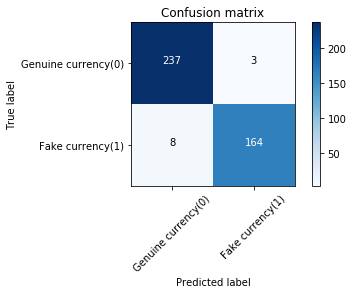

In [23]:
# Compute confusion matrix for train:test ratio 70:30
Decisiontree_matrix = confusion_matrix(y_test,pred_tree)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Decisiontree_matrix, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[165   3]
 [  5 102]]


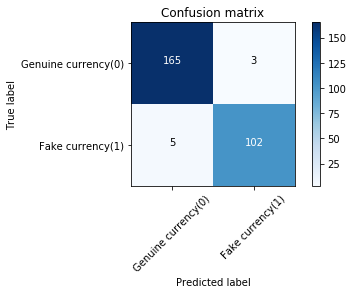

In [24]:
# Compute confusion matrix for train:test ratio 80:20
Decisiontree_matrix = confusion_matrix(y_test1,bank_tree.predict(x_test1))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Decisiontree_matrix, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[76  2]
 [ 4 56]]


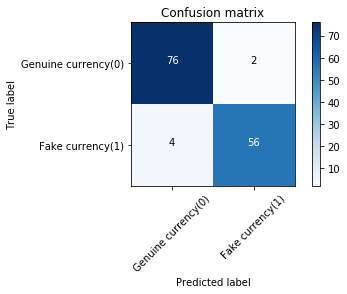

In [25]:
# Compute confusion matrix for train:test ratio 90:10
Decisiontree_matrix = confusion_matrix(y_test2,bank_tree.predict(x_test2))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Decisiontree_matrix, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

## Data Visualization

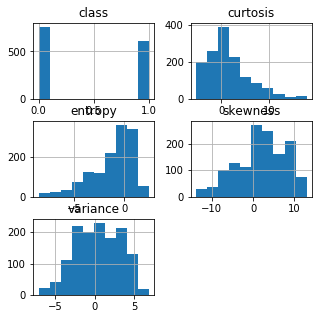

In [26]:
banknote_dataset.hist(figsize = (5,5))
plt.show()

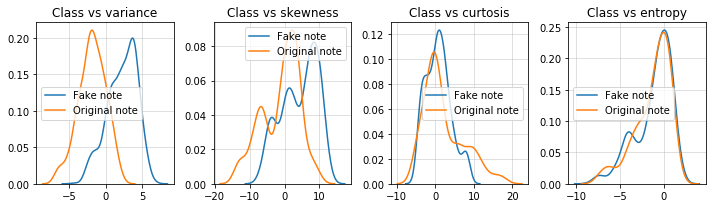

In [27]:
col_names = banknote_dataset.drop('class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(banknote_dataset[col][banknote_dataset['class'] ==0], label = 'Fake note')
    sns.kdeplot(banknote_dataset[col][banknote_dataset['class'] ==1], label = 'Original note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()

In [28]:
from sklearn.externals.six import StringIO

import graphviz
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 


In [29]:
!conda install -c conda-forge pydotplus -y
import pydotplus

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda

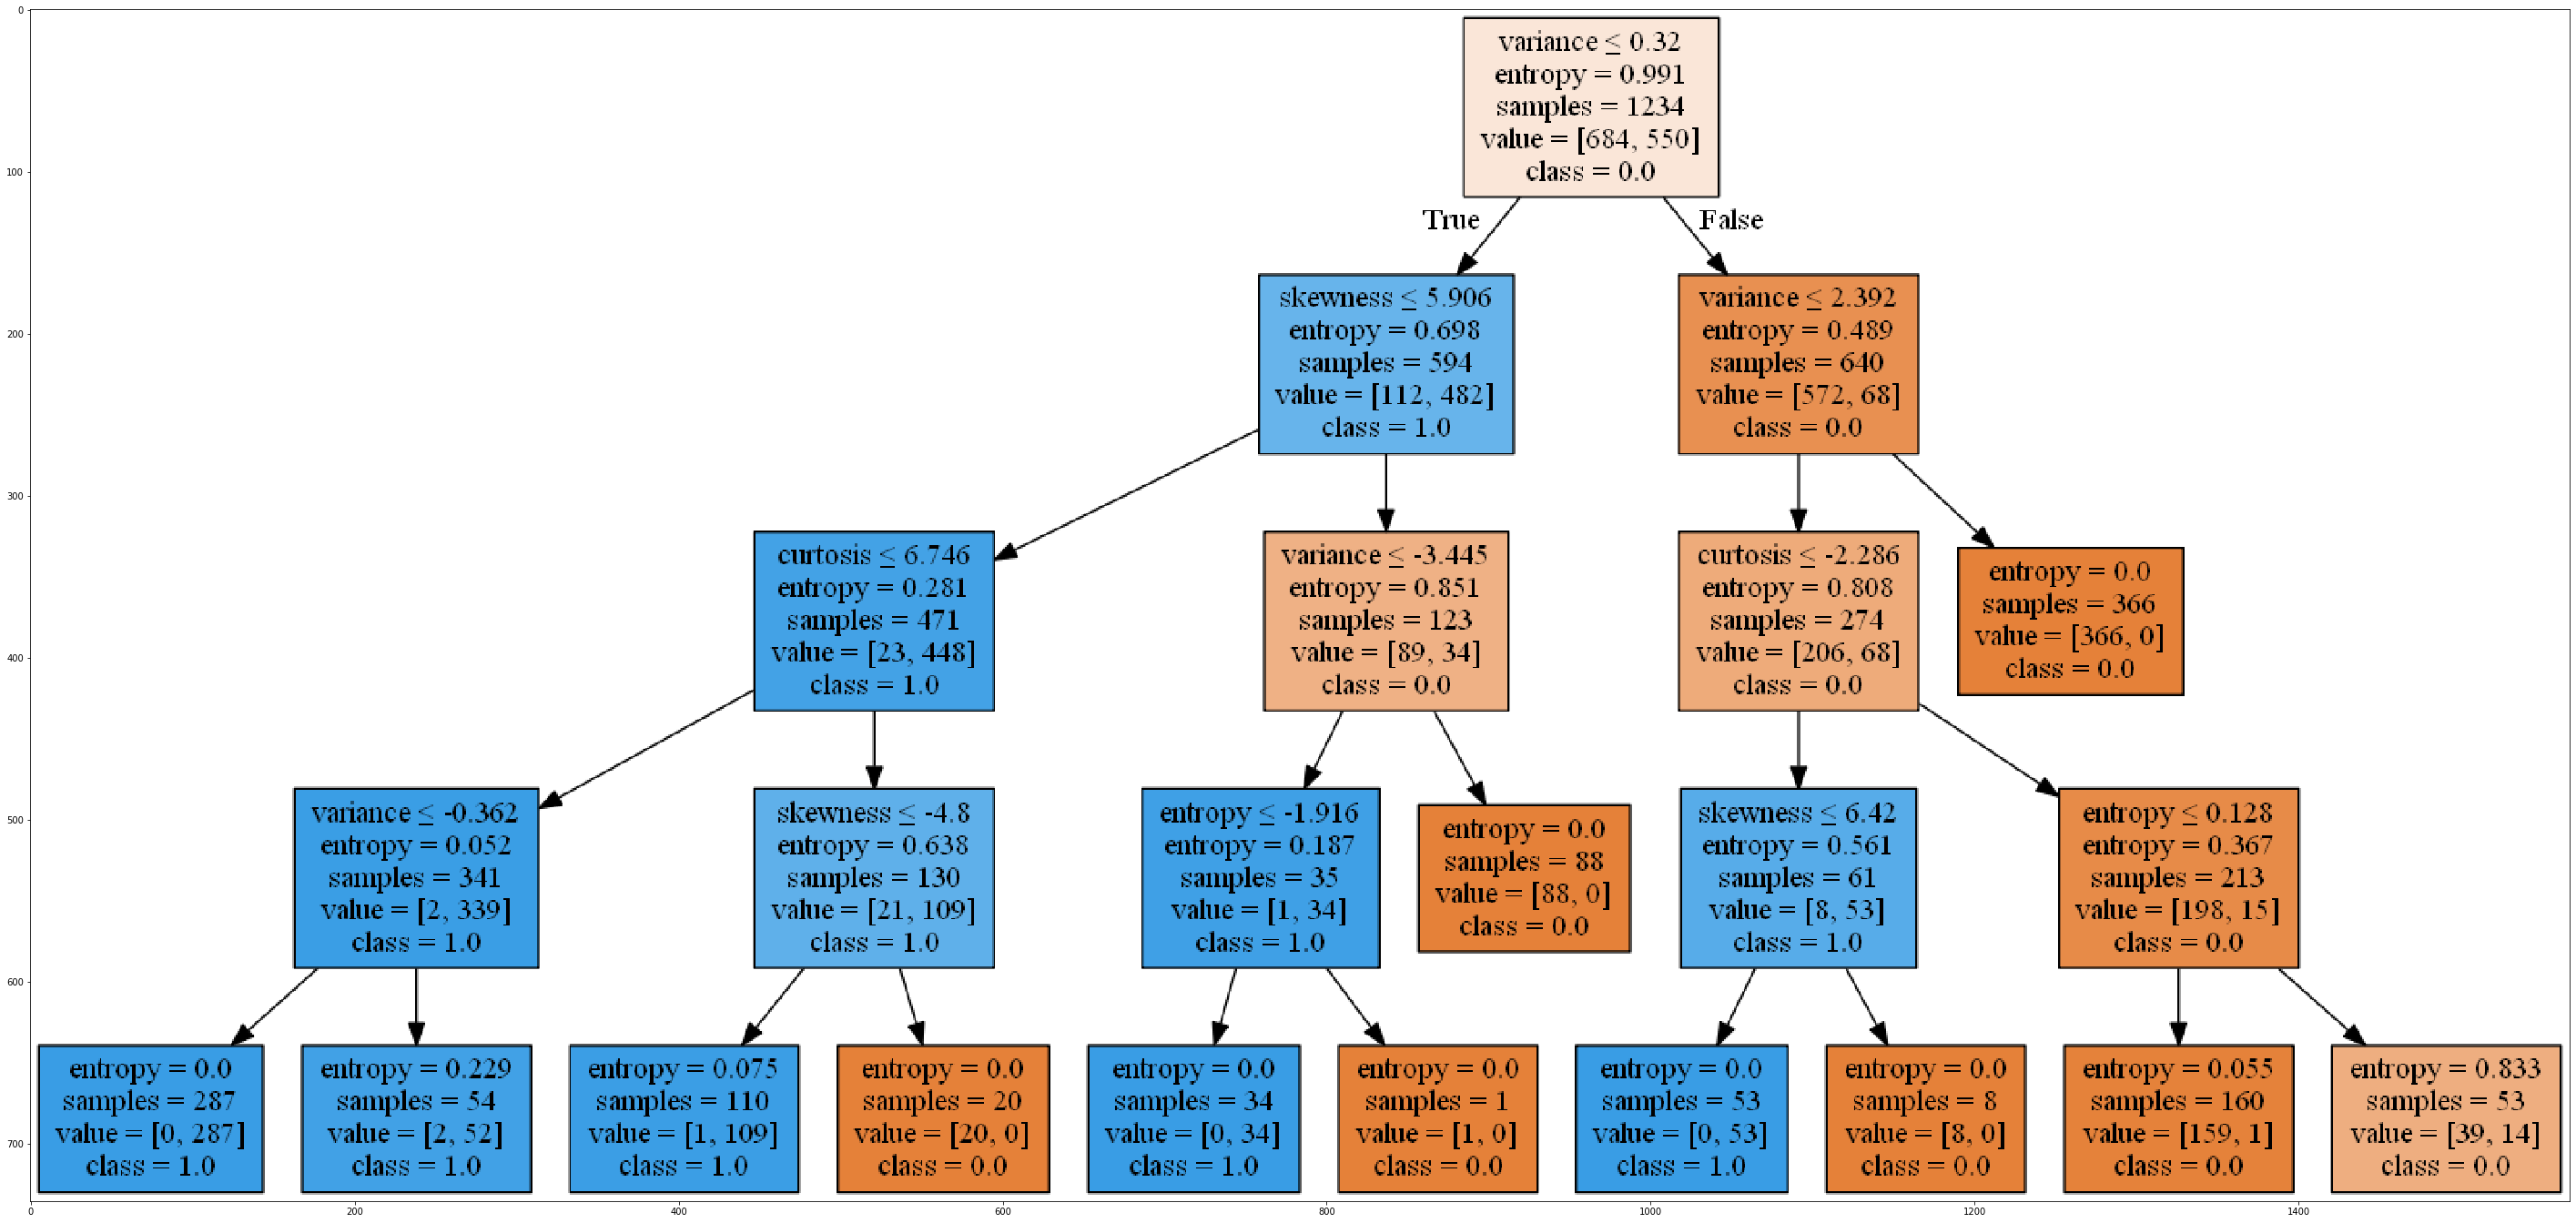

In [30]:
dot_data = StringIO()
filename = "banktree.png"
featureNames = df.columns[0:4]
targetNames = df["class"].unique().tolist()
out=tree.export_graphviz(bank_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 60))
plt.imshow(img,interpolation='nearest')

# Naive bayes classification

## Preprocessing

In [31]:
X = df.drop('class', axis = 1)
print(X[0:5])

   variance  skewness  curtosis  entropy
0   3.62160    8.6661   -2.8073 -0.44699
1   4.54590    8.1674   -2.4586 -1.46210
2   3.86600   -2.6383    1.9242  0.10645
3   3.45660    9.5228   -4.0112 -3.59440
4   0.32924   -4.4552    4.5718 -0.98880


In [32]:
Y = df['class']
print(Y[0:5])

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: object


## Training and Testing Data set


In [33]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=3) # train:test ratio 70:30
train1_x, test1_x, train1_y, test1_y = train_test_split(X, Y, test_size=0.2, random_state=3) # train:test ratio 80:20
train2_x, test2_x, train2_y, test2_y = train_test_split(X, Y, test_size=0.1, random_state=3) # train:test ratio 90:10

## Building a model

In [34]:
bank_gnb = GaussianNB() 
bank_gnb.fit(train_x, train_y) 
yhat = bank_gnb.predict(test_x) 
yhat[0:10]

array(['1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0'], dtype='<U3')

In [35]:
bank_gnb.fit(train1_x,train1_y)
yhat1 = bank_gnb.predict(test1_x)
yhat1[0:10]

array(['1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0'], dtype='<U3')

In [36]:
bank_gnb.fit(train2_x,train2_y)
yhat2 = bank_gnb.predict(test2_x)
yhat2[0:10]

array(['1.0', '0.0', '0.0', '1.0', '1.0', '1.0', '1.0', '0.0', '1.0',
       '1.0'], dtype='<U3')

In [37]:
yhat_proba = bank_gnb.predict_proba(test_x)
yhat_proba[0:10]

array([[4.22e-01, 5.78e-01],
       [9.99e-01, 8.19e-04],
       [9.70e-01, 3.01e-02],
       [1.54e-02, 9.85e-01],
       [2.07e-03, 9.98e-01],
       [4.27e-01, 5.73e-01],
       [2.31e-02, 9.77e-01],
       [6.90e-01, 3.10e-01],
       [5.32e-02, 9.47e-01],
       [3.83e-04, 1.00e+00]])

In [38]:
yhat_proba1 = bank_gnb.predict_proba(test1_x)
yhat_proba1[0:10]

array([[4.22e-01, 5.78e-01],
       [9.99e-01, 8.19e-04],
       [9.70e-01, 3.01e-02],
       [1.54e-02, 9.85e-01],
       [2.07e-03, 9.98e-01],
       [4.27e-01, 5.73e-01],
       [2.31e-02, 9.77e-01],
       [6.90e-01, 3.10e-01],
       [5.32e-02, 9.47e-01],
       [3.83e-04, 1.00e+00]])

In [39]:
yhat_proba2 = bank_gnb.predict_proba(test2_x)
yhat_proba2[0:10]

array([[4.22e-01, 5.78e-01],
       [9.99e-01, 8.19e-04],
       [9.70e-01, 3.01e-02],
       [1.54e-02, 9.85e-01],
       [2.07e-03, 9.98e-01],
       [4.27e-01, 5.73e-01],
       [2.31e-02, 9.77e-01],
       [6.90e-01, 3.10e-01],
       [5.32e-02, 9.47e-01],
       [3.83e-04, 1.00e+00]])

## Evaluation metrics

In [42]:
# train:test ratio 70:30
from sklearn import metrics
loss = metrics.log_loss(test_y,yhat_proba[:,1])*100
auc = metrics.roc_auc_score(test_y, yhat_proba[:,1])*100
print("Naive bayes classification's Accuracy(Test set Accuracy): ", metrics.accuracy_score(test_y, yhat)*100)
print("Train set Accuracy:", metrics.accuracy_score(train_y, bank_gnb.predict(train_x))*100)
print("Log loss of test set:", loss )
print("Area Under the Receiver Operating Characteristic Curve:", auc)

Naive bayes classification's Accuracy(Test set Accuracy):  84.70873786407766
Train set Accuracy: 83.64583333333333
Log loss of test set: 31.3162512564194
Area Under the Receiver Operating Characteristic Curve: 93.9874031007752


In [44]:
# train:test ratio 80:20
from sklearn import metrics
loss = metrics.log_loss(test1_y,yhat_proba1[:,1])*100
auc = metrics.roc_auc_score(test1_y, yhat_proba1[:,1])*100
print("Naive bayes classification's Accuracy(Test set Accuracy): ", metrics.accuracy_score(test1_y, yhat1)*100)
print("Train set Accuracy:", metrics.accuracy_score(train1_y, bank_gnb.predict(train1_x))*100)
print("Log loss of test set:", loss )
print("Area Under the Receiver Operating Characteristic Curve:", auc)

Naive bayes classification's Accuracy(Test set Accuracy):  86.18181818181819
Train set Accuracy: 83.7739288969918
Log loss of test set: 29.38373340278588
Area Under the Receiver Operating Characteristic Curve: 94.47040498442367


In [45]:
# train:test ratio 90:10
from sklearn import metrics
loss = metrics.log_loss(test2_y,yhat_proba2[:,1])*100
auc = metrics.roc_auc_score(test2_y, yhat_proba2[:,1])*100
print("Naive bayes classification's Accuracy(Test set Accuracy): ", metrics.accuracy_score(test2_y, yhat2)*100)
print("Train set Accuracy:", metrics.accuracy_score(train2_y, bank_gnb.predict(train2_x))*100)
print("Log loss of test set:", loss )
print("Area Under the Receiver Operating Characteristic Curve:", auc)

Naive bayes classification's Accuracy(Test set Accuracy):  83.33333333333334
Train set Accuracy: 84.11669367909238
Log loss of test set: 31.70991099858078
Area Under the Receiver Operating Characteristic Curve: 93.84615384615384


## Confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
import itertools

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[208  32]
 [ 31 141]]


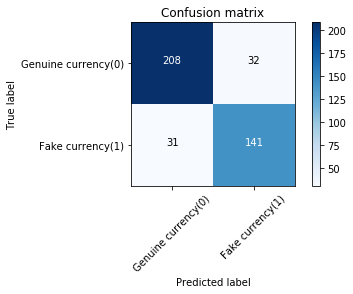

In [48]:
# Compute confusion matrix for train:test ratio 70:30
Naivebayesclassification_matrix = confusion_matrix(test_y,yhat)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Naivebayesclassification_matrix, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[148  20]
 [ 18  89]]


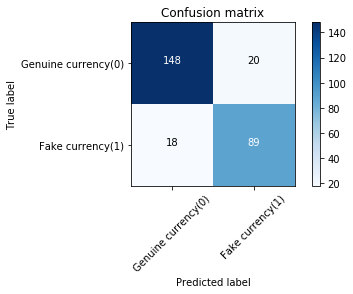

In [49]:
# Compute confusion matrix for train:test ratio 80:20
Naivebayesclassification_matrix = confusion_matrix(test1_y,yhat1)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Naivebayesclassification_matrix, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

Confusion matrix, without normalization
[[67 11]
 [12 48]]


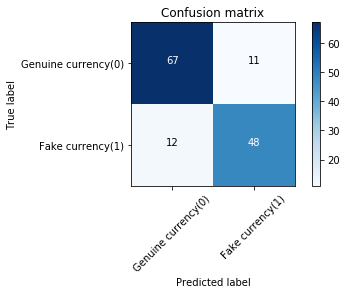

In [50]:
# Compute confusion matrix for train:test ratio 90:10
Naivebayesclassification_matrix = confusion_matrix(test2_y,yhat2)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(Naivebayesclassification_matrix, classes=['Genuine currency(0)','Fake currency(1)'],normalize= False,  title='Confusion matrix')

## Data visualization

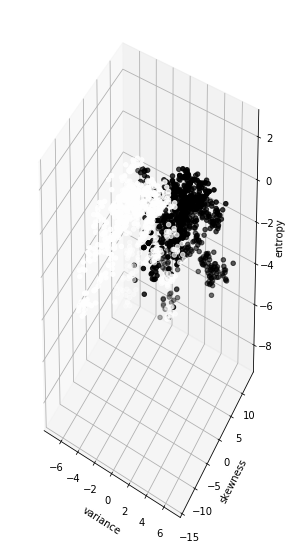

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (5,10))
ax = fig.add_subplot(111, projection='3d')
xs = df['variance']
ys = df['skewness']
zs = df['entropy']
ax.scatter(xs, ys, zs, c=df['class'])
ax.set_xlabel('variance')
ax.set_ylabel('skewness')
ax.set_zlabel('entropy')
plt.show()

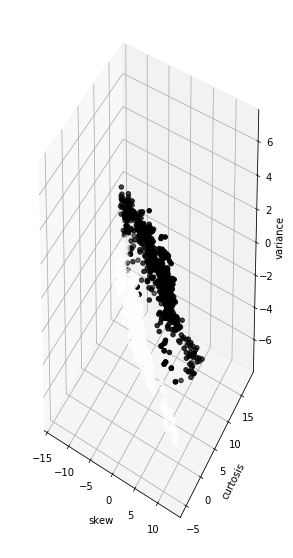

In [59]:
fig = plt.figure(figsize = (5,10))
ax = fig.add_subplot(111, projection='3d')
xs = df['skewness']
ys = df['curtosis']
zs = df['variance']
ax.scatter(xs, ys, zs, c=df['class'])
ax.set_xlabel('skew')
ax.set_ylabel('curtosis')
ax.set_zlabel('variance')
plt.show()